In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ROOT_DIR = os.path.dirname(os.path.abspath(""))

file = os.path.join(ROOT_DIR, "data/sitges_access.csv")
df = pd.read_csv(file)
df.head()

,Unnamed: 0,server_name,IP,logname,authenticate,date,petition,URL,status,bytes,referer,user-agent,level
0,0,sitgesanytime.com,47.76.35.19,-,-,2024-01-22 00:00:00+01:00,HEAD,/fr/pag492/explora-platges-i-ports-2/id12/les-...,301,4840,-,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0
1,1,www.sitgesanytime.com,47.76.35.19,-,-,2024-01-22 00:00:01+01:00,HEAD,/fr/pag492/explora-platges-i-ports-2/id12/les-...,200,5223,-,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0
2,2,www.sitgesanytime.com,40.77.167.53,-,-,2024-01-22 00:00:06+01:00,GET,/ca/noticias/84/sitges-obt%C3%A9-el-certificat...,404,2509,-,"Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Ge...",5
3,3,sitgesanytime.com,47.76.35.19,-,-,2024-01-22 00:00:06+01:00,HEAD,/fr/pag492/explora-platges-i-ports-2/id12/les-...,301,4840,-,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,0
4,4,www.sitgesanytime.com,47.76.35.19,-,-,2024-01-22 00:00:07+01:00,HEAD,/fr/pag492/explora-platges-i-ports-2/id12/les-...,200,5260,-,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,0


In [9]:
df_clean = df.copy()

In [10]:
# shuffle the rows
df_clean = df_clean.sample(frac=1, random_state=42).reset_index(drop=True)
df_clean.head()

,Unnamed: 0,server_name,IP,logname,authenticate,date,petition,URL,status,bytes,referer,user-agent,level
0,111926,www.sitgesanytime.com,86.4.35.245,-,-,2024-01-23 19:14:34+01:00,GET,/plantilles/turisme/js/responsivemenu.js?v=3 H...,200,1913,https://www.sitgesanytime.com/en/pl409/blog/id...,Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...,0
1,119842,www.sitgesanytime.com,168.119.65.47,-,-,2024-01-26 20:22:25+01:00,GET,/plantilles/turisme/css/estils-mw800.css?v=11 ...,200,3914,https://www.sitgesanytime.com/es/planifica-el-...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0
2,56123,www.sitgesanytime.com,64.124.8.65,-,-,2024-01-23 10:59:54+01:00,GET,/ca/pl349/actualitat/noticies/id189/l-exposici...,200,13883,-,Mozilla/5.0 (compatible; ImagesiftBot; +images...,0
3,6249,www.sitgesanytime.com,216.244.66.199,-,-,2024-01-26 01:08:45+01:00,GET,/ca/noticias/20/la-gay-pride-reivindica-els-dr...,404,7269,-,Mozilla/5.0 (compatible; DotBot/1.2; +https://...,10
4,31977,www.sitgesanytime.com,168.119.65.45,-,-,2024-01-24 06:47:46+01:00,GET,/plantilles/turisme/css/estils-mw500.css?v=14 ...,200,1233,https://www.sitgesanytime.com/fr/pl50/planifie...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0


### Drop useless columns

In [11]:
# remove columns
df_clean = df_clean.drop(columns=["logname", "authenticate", "Unnamed: 0", "server_name"])
df_clean.columns

Index(['IP', 'date', 'petition', 'URL', 'status', 'bytes', 'referer',
       'user-agent', 'level'],
      dtype='object')

### IP

223


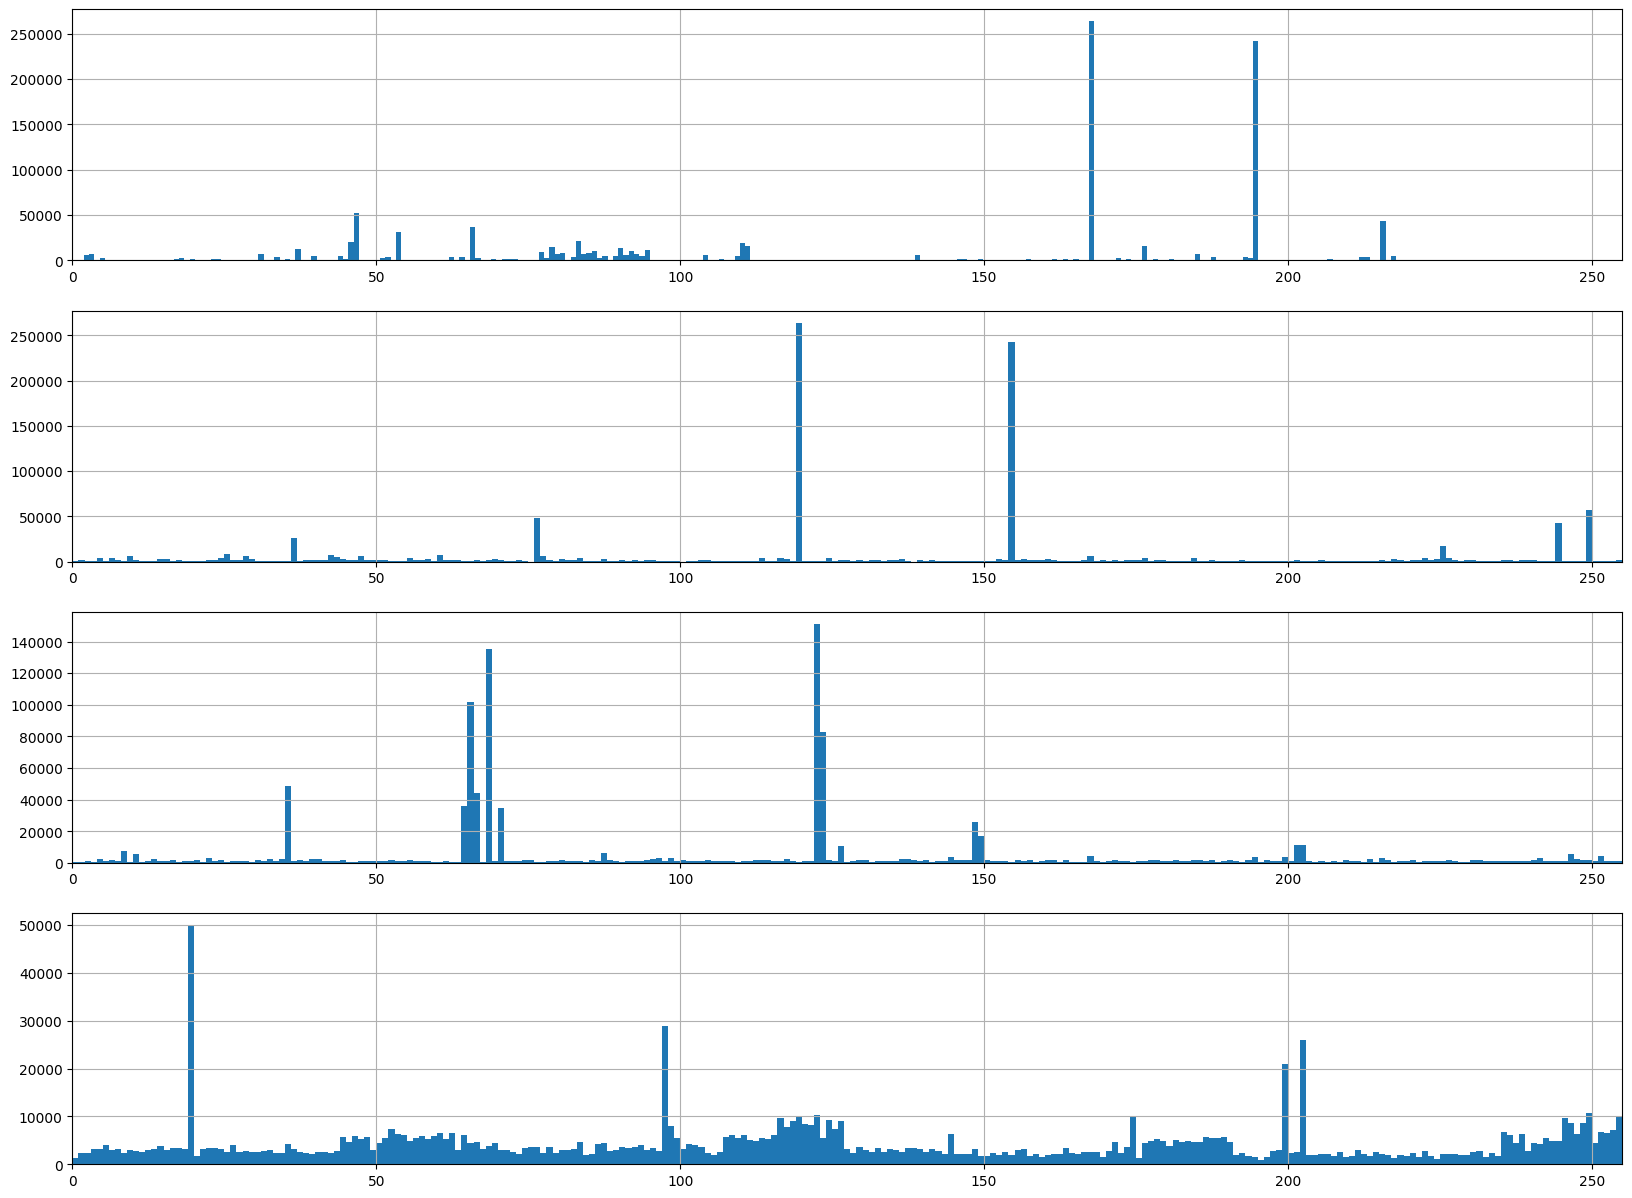

In [12]:
fig, ax = plt.subplots(4, 1, figsize=(20, 15))
for i in range(4):
	df_clean["IP"].apply(lambda x: int(x.split(".")[i])).hist(bins=255, ax=ax[i])
	ax[i].set_xlim([0, 255])
print(df_clean["IP"].apply(lambda x: int(x.split(".")[0])).max())
plt.show()

In [13]:
import json

normalize_path = os.path.join(ROOT_DIR, "models/normalize.json")

with open(normalize_path, "r") as f:
	normalize = json.load(f)
	df_temp = df_clean.copy()
	IP_octs = df_temp["IP"].apply(lambda x: x.split("."))
	for i in range(4):
		df_temp["IP_oct" + str(i)] = IP_octs.apply(lambda x: float(x[i]))
		mean, std = df_temp["IP_oct" + str(i)].mean(), df_temp["IP_oct" + str(i)].std()
		df_temp["IP_oct" + str(i)] = (df_temp["IP_oct" + str(i)] - mean) / std
		normalize["IP_oct" + str(i)] = {"mean": mean, "std": std}
	json.dump(normalize, open(normalize_path, "w"))

df_temp = df_temp.drop(columns=["IP"])
df_clean = df_temp.copy()
df_clean.head()

,date,petition,URL,status,bytes,referer,user-agent,level,IP_oct0,IP_oct1,IP_oct2,IP_oct3
0,2024-01-23 19:14:34+01:00,GET,/plantilles/turisme/js/responsivemenu.js?v=3 H...,200,1913,https://www.sitgesanytime.com/en/pl409/blog/id...,Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...,0,-0.832332,-2.085490,-1.236864,1.598875
1,2024-01-26 20:22:25+01:00,GET,/plantilles/turisme/css/estils-mw800.css?v=11 ...,200,3914,https://www.sitgesanytime.com/es/planifica-el-...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.527170,-0.249942,-0.705383,-1.059479
2,2024-01-23 10:59:54+01:00,GET,/ca/pl349/actualitat/noticies/id189/l-exposici...,200,13883,-,Mozilla/5.0 (compatible; ImagesiftBot; +images...,0,-1.197077,-0.170136,-1.715197,-0.817811
3,2024-01-26 01:08:45+01:00,GET,/ca/noticias/20/la-gay-pride-reivindica-els-dr...,404,7269,-,Mozilla/5.0 (compatible; DotBot/1.2; +https://...,10,1.322976,1.745219,-0.687667,0.981277
4,2024-01-24 06:47:46+01:00,GET,/plantilles/turisme/css/estils-mw500.css?v=14 ...,200,1233,https://www.sitgesanytime.com/fr/pl50/planifie...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.527170,-0.249942,-0.705383,-1.086331


### Date

In [14]:
df_clean["date"] = df["date"].str.split("+").str[0]
df_clean["date"].head()

0    2024-01-22 00:00:00
1    2024-01-22 00:00:01
2    2024-01-22 00:00:06
3    2024-01-22 00:00:06
4    2024-01-22 00:00:07
Name: date, dtype: object

In [15]:
def sin_transform(x, period=24):
	return np.sin(2 * np.pi * x / period)

def cos_transform(x, period=24):
	return np.cos(2 * np.pi * x / period)

df_temp = df_clean.copy()

In [16]:
df_temp["date"] = pd.to_datetime(df_temp["date"])
df_temp["month"] = df_temp["date"].dt.month
df_temp["day"] = df_temp["date"].dt.day
df_temp["weekday"] = df_temp["date"].dt.weekday
df_temp["hour"] = df_temp["date"].dt.hour
df_temp["minute"] = df_temp["date"].dt.minute

In [17]:
df_temp["month_sin"] = sin_transform(df_temp["month"], 12)
df_temp["month_cos"] = cos_transform(df_temp["month"], 12)
df_temp["day_sin"] = sin_transform(df_temp["day"], 31)
df_temp["day_cos"] = cos_transform(df_temp["day"], 31)
df_temp["weekday_sin"] = sin_transform(df_temp["weekday"], 7)
df_temp["weekday_cos"] = cos_transform(df_temp["weekday"], 7)
df_temp["hour_sin"] = sin_transform(df_temp["hour"], 24)
df_temp["hour_cos"] = cos_transform(df_temp["hour"], 24)
df_temp["minute_sin"] = sin_transform(df_temp["minute"], 60)
df_temp["minute_cos"] = cos_transform(df_temp["minute"], 60)

df_temp.drop(["date", 'month', 'day', 'weekday', 'hour', 'minute'], axis=1, inplace=True)

In [18]:
df_clean = df_temp.copy()
df_clean.sample(frac=1, random_state=42).reset_index(drop=True).head()

,petition,URL,status,bytes,referer,user-agent,level,IP_oct0,IP_oct1,IP_oct2,...,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,hour_sin,hour_cos,minute_sin,minute_cos
0,GET,/comu/fancybox/jquery.fancybox.css?v=2.1.7 HTT...,200,1512,https://www.sitgesanytime.com/es/pl409/blog/id...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.527170,-0.249942,-0.705383,...,0.5,0.866025,-0.998717,-0.050649,0.781831,0.623490,-0.965926,2.588190e-01,0.994522,0.104528
1,GET,/comu/fancybox/helpers/jquery.fancybox-buttons...,200,744,https://www.sitgesanytime.com/es/pl349/actuali...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.974811,0.308703,0.304431,...,0.5,0.866025,-0.848644,0.528964,-0.433884,-0.900969,-0.866025,5.000000e-01,0.743145,-0.669131
2,GET,/comu/js/iban.js HTTP/1.1,200,8947,https://www.sitgesanytime.com/es/actualidad/no...,"Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Ge...",0,-1.163918,1.825025,-0.616803,...,0.5,0.866025,-0.998717,-0.050649,0.781831,0.623490,0.500000,-8.660254e-01,-0.104528,0.994522
3,GET,/plantilles/turisme/js/bgvideo.js HTTP/2.0,200,5210,https://www.sitgesanytime.com/en/what-to-do/pl...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.527170,-0.249942,-0.652235,...,0.5,0.866025,-0.848644,0.528964,-0.433884,-0.900969,0.258819,9.659258e-01,0.743145,0.669131
4,GET,/plantilles/turisme/img/ico-arrow-down.gif HTT...,200,1329,https://www.sitgesanytime.com/de/pl355/entdeck...,Mozilla/5.0 (iPhone; CPU iPhone OS 16_6 like M...,0,-0.948387,0.340625,1.952023,...,0.5,0.866025,-0.988468,0.151428,0.974928,-0.222521,1.000000,6.123234e-17,-0.978148,0.207912


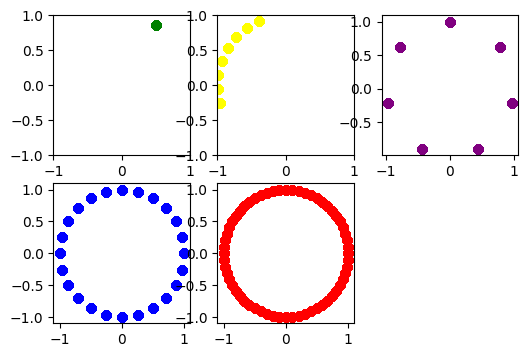

In [19]:
plt.figure(figsize=(3*2, 2*2))
sample_df = df_clean.sample(10000, random_state=42).reset_index(drop=True)
plt.subplot(2, 3, 1)
plt.scatter(sample_df["month_sin"], sample_df["month_cos"], color="green")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.subplot(2, 3, 2)
plt.scatter(sample_df["day_sin"], sample_df["day_cos"], color="yellow")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.subplot(2, 3, 3)
plt.scatter(sample_df["weekday_sin"], sample_df["weekday_cos"], color="purple")
plt.subplot(2, 3, 4)
plt.scatter(sample_df["hour_sin"], sample_df["hour_cos"], color="blue")
plt.subplot(2, 3, 5)
plt.scatter(sample_df["minute_sin"], sample_df["minute_cos"], color="red")

plt.show()

### Petition

In [20]:
df_clean["petition"].value_counts()

petition
GET        1024862
POST         27258
HEAD         24800
-              436
CONNECT         29
OPTIONS          7
USER             1
Name: count, dtype: int64

In [21]:
df_clean = pd.get_dummies(df_clean, columns=["petition"], dtype=int)
columns_to_combine = ["petition_CONNECT", "petition_OPTIONS", "petition_USER"]
df_clean["petition_other"] = df_clean[columns_to_combine].max(axis=1) # combine using OR
df_clean = df_clean.drop(columns=columns_to_combine)
print(df_clean["petition_other"].value_counts())
df_clean.head()

petition_other
0    1077356
1         37
Name: count, dtype: int64


,URL,status,bytes,referer,user-agent,level,IP_oct0,IP_oct1,IP_oct2,IP_oct3,...,weekday_cos,hour_sin,hour_cos,minute_sin,minute_cos,petition_-,petition_GET,petition_HEAD,petition_POST,petition_other
0,/plantilles/turisme/js/responsivemenu.js?v=3 H...,200,1913,https://www.sitgesanytime.com/en/pl409/blog/id...,Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...,0,-0.832332,-2.085490,-1.236864,1.598875,...,1.0,0.0,1.0,0.0,1.0,0,1,0,0,0
1,/plantilles/turisme/css/estils-mw800.css?v=11 ...,200,3914,https://www.sitgesanytime.com/es/planifica-el-...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.527170,-0.249942,-0.705383,-1.059479,...,1.0,0.0,1.0,0.0,1.0,0,1,0,0,0
2,/ca/pl349/actualitat/noticies/id189/l-exposici...,200,13883,-,Mozilla/5.0 (compatible; ImagesiftBot; +images...,0,-1.197077,-0.170136,-1.715197,-0.817811,...,1.0,0.0,1.0,0.0,1.0,0,1,0,0,0
3,/ca/noticias/20/la-gay-pride-reivindica-els-dr...,404,7269,-,Mozilla/5.0 (compatible; DotBot/1.2; +https://...,10,1.322976,1.745219,-0.687667,0.981277,...,1.0,0.0,1.0,0.0,1.0,0,1,0,0,0
4,/plantilles/turisme/css/estils-mw500.css?v=14 ...,200,1233,https://www.sitgesanytime.com/fr/pl50/planifie...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.527170,-0.249942,-0.705383,-1.086331,...,1.0,0.0,1.0,0.0,1.0,0,1,0,0,0


### URL

In [22]:
df_temp = df_clean.copy()
df_temp["URL"].str.contains(r"HTTP/\d+\.\d+").value_counts()

URL
True     1076959
False        432
Name: count, dtype: int64

In [23]:
df_temp = df_temp[df_temp["URL"].str.contains(r"HTTP/\d+\.\d+").fillna(False)]

In [48]:
from skipgram import *

embeddings_url = load_embeddings(os.path.join(ROOT_DIR, "models/embeddings-url.pt"))
idx2word_url = load_idx2word(os.path.join(ROOT_DIR, "models/idx2word-url.json"))
tokenizer_url = load_tokenizer(os.path.join(ROOT_DIR, "models"), "charbpe-url")
embeddings_url.shape, embeddings_url.mean(), embeddings_url.std()

(torch.Size([923, 30]), tensor(0.0502), tensor(0.7491))

In [51]:
# --- example of how to get the embeddings of the urls ---
# --- running might take ~1:30 min and 3.3 GB ---
urls_embeddings = []
word2idx_url = {word: idx for idx, word in idx2word_url.items()}
for url in tqdm(df_temp["URL"]):
	tokens = tokenizer_url.encode(url).tokens
	tokens_idx = get_idx(tokens, word2idx_url)
	url_embedding = embeddings_url[tokens_idx]
	urls_embeddings.append(url_embedding.to(torch.float32))

100%|██████████| 1076959/1076959 [01:40<00:00, 10767.24it/s]


In [26]:
df_clean = df_temp.copy()

### Status

In [27]:
df_temp = df_clean.copy()
df_temp["status"] = df_temp["status"].apply(lambda x: str(x)[0])
df_temp["status_1"] = False
df_temp = pd.get_dummies(df_temp, columns=["status"], dtype=int)
df_clean = df_temp.copy()
df_clean.head()

,URL,bytes,referer,user-agent,level,IP_oct0,IP_oct1,IP_oct2,IP_oct3,month_sin,...,petition_-,petition_GET,petition_HEAD,petition_POST,petition_other,status_1,status_2,status_3,status_4,status_5
0,/plantilles/turisme/js/responsivemenu.js?v=3 H...,1913,https://www.sitgesanytime.com/en/pl409/blog/id...,Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...,0,-0.832332,-2.085490,-1.236864,1.598875,0.5,...,0,1,0,0,0,False,1,0,0,0
1,/plantilles/turisme/css/estils-mw800.css?v=11 ...,3914,https://www.sitgesanytime.com/es/planifica-el-...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.527170,-0.249942,-0.705383,-1.059479,0.5,...,0,1,0,0,0,False,1,0,0,0
2,/ca/pl349/actualitat/noticies/id189/l-exposici...,13883,-,Mozilla/5.0 (compatible; ImagesiftBot; +images...,0,-1.197077,-0.170136,-1.715197,-0.817811,0.5,...,0,1,0,0,0,False,1,0,0,0
3,/ca/noticias/20/la-gay-pride-reivindica-els-dr...,7269,-,Mozilla/5.0 (compatible; DotBot/1.2; +https://...,10,1.322976,1.745219,-0.687667,0.981277,0.5,...,0,1,0,0,0,False,0,0,1,0
4,/plantilles/turisme/css/estils-mw500.css?v=14 ...,1233,https://www.sitgesanytime.com/fr/pl50/planifie...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.527170,-0.249942,-0.705383,-1.086331,0.5,...,0,1,0,0,0,False,1,0,0,0


### Bytes

<Axes: >

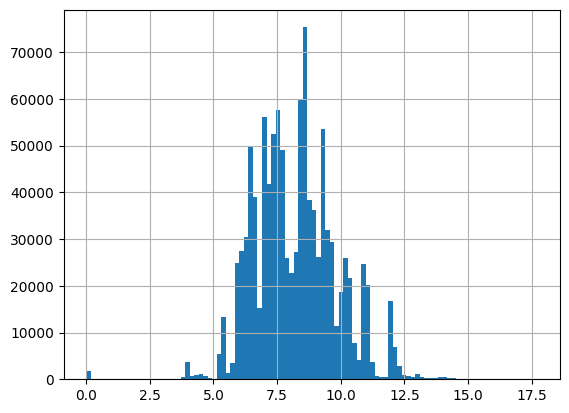

In [31]:
df_temp = df_clean.copy()
df_temp["bytes"] = np.log(df_temp["bytes"]+1)
df_temp["bytes"].hist(bins=100)

<Axes: >

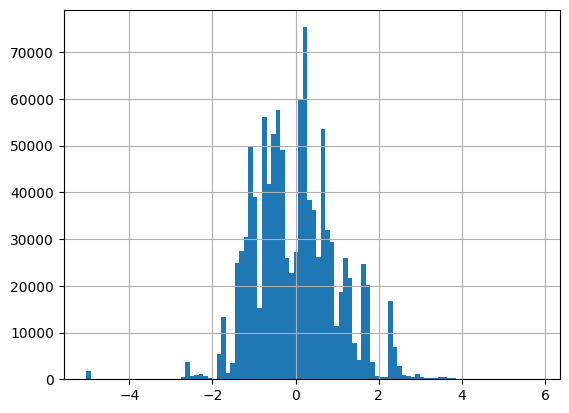

In [33]:
mean, std = df_temp["bytes"].mean(), df_temp["bytes"].std()
bytes_scaled = (df_temp["bytes"] - mean) / std
df_temp["bytes"] = bytes_scaled
df_clean = df_temp.copy()

with open(normalize_path, "r") as f:
	normalize = json.load(f)
	normalize["bytes"] = {"mean": mean, "std": std}
	json.dump(normalize, open(normalize_path, "w"))

df_clean["bytes"].hist(bins=100)

### Referer

In [50]:
embeddings_referer = load_embeddings(os.path.join(ROOT_DIR, "models/embeddings-referer.pt"))
idx2word_referer = load_idx2word(os.path.join(ROOT_DIR, "models/idx2word-referer.json"))
tokenizer_referer = load_tokenizer(os.path.join(ROOT_DIR, "models"), "charbpe-referer")
embeddings_referer.shape, embeddings_referer.mean(), embeddings_referer.std()

(torch.Size([1058, 30]), tensor(0.1369), tensor(0.8011))

In [57]:
df_temp = df_clean.copy()
df_temp = df_temp.dropna(subset=["referer"])
df_temp["referer"].isnull().sum()

0

In [59]:
# --- example of how to get the embeddings of the referers ---
# --- running might take ~1:30 min and 3.3 GB ---
referers_embeddings = []
word2idx_referer = {word: idx for idx, word in idx2word_referer.items()}
for referer in tqdm(df_temp["referer"]):
	tokens = tokenizer_referer.encode(referer).tokens
	tokens_idx = get_idx(tokens, word2idx_referer)
	referer_embedding = embeddings_referer[tokens_idx]
	referers_embeddings.append(referer_embedding.to(torch.float32))

  0%|          | 0/1076925 [00:00<?, ?it/s]

100%|██████████| 1076925/1076925 [02:01<00:00, 8866.42it/s]


In [60]:
df_clean = df_temp.copy()

### User agent

In [47]:
embeddings_useragent = load_embeddings(os.path.join(ROOT_DIR, "models/embeddings-useragent.pt"))
idx2word_useragent = load_idx2word(os.path.join(ROOT_DIR, "models/idx2word-useragent.json"))
tokenizer_useragent = load_tokenizer(os.path.join(ROOT_DIR, "models"), "charbpe-useragent")
embeddings_useragent.shape, embeddings_useragent.mean(), embeddings_useragent.std()

(torch.Size([785, 30]), tensor(-0.0284), tensor(0.8834))

In [61]:
df_temp = df_clean.copy()
df_temp = df_temp.dropna(subset=["user-agent"])
df_temp["user-agent"].isnull().sum()

0

In [75]:
# --- example of how to get the embeddings of the user agent ---
# --- running might take ~1:30 min and 3.3 GB ---
useragents_embeddings = []
word2idx_useragent = {word: idx for idx, word in idx2word_useragent.items()}
for useragent in tqdm(df_temp["user-agent"]):
	tokens = tokenizer_useragent.encode(useragent).tokens
	tokens_idx = get_idx(tokens, word2idx_useragent)
	useragent_embedding = embeddings_useragent[tokens_idx]
	useragents_embeddings.append(useragent_embedding.to(torch.float32))

100%|██████████| 1076925/1076925 [02:18<00:00, 7780.64it/s]


In [76]:
df_clean = df_temp.copy()

In [78]:
print(df_clean.shape)
print(df_clean.isnull().sum().sum())
df_clean.head()

(1076925, 29)
0


,URL,bytes,referer,user-agent,level,IP_oct0,IP_oct1,IP_oct2,IP_oct3,month_sin,...,petition_-,petition_GET,petition_HEAD,petition_POST,petition_other,status_1,status_2,status_3,status_4,status_5
0,/plantilles/turisme/js/responsivemenu.js?v=3 H...,-0.410804,https://www.sitgesanytime.com/en/pl409/blog/id...,Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...,0,-0.832332,-2.085490,-1.236864,1.598875,0.5,...,0,1,0,0,0,False,1,0,0,0
1,/plantilles/turisme/css/estils-mw800.css?v=11 ...,0.027297,https://www.sitgesanytime.com/es/planifica-el-...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.527170,-0.249942,-0.705383,-1.059479,0.5,...,0,1,0,0,0,False,1,0,0,0
2,/ca/pl349/actualitat/noticies/id189/l-exposici...,0.802291,-,Mozilla/5.0 (compatible; ImagesiftBot; +images...,0,-1.197077,-0.170136,-1.715197,-0.817811,0.5,...,0,1,0,0,0,False,1,0,0,0
3,/ca/noticias/20/la-gay-pride-reivindica-els-dr...,0.406211,-,Mozilla/5.0 (compatible; DotBot/1.2; +https://...,10,1.322976,1.745219,-0.687667,0.981277,0.5,...,0,1,0,0,0,False,0,0,1,0
4,/plantilles/turisme/css/estils-mw500.css?v=14 ...,-0.679519,https://www.sitgesanytime.com/fr/pl50/planifie...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.527170,-0.249942,-0.705383,-1.086331,0.5,...,0,1,0,0,0,False,1,0,0,0


In [79]:
df_clean.columns

Index(['URL', 'bytes', 'referer', 'user-agent', 'level', 'IP_oct0', 'IP_oct1',
       'IP_oct2', 'IP_oct3', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'weekday_sin', 'weekday_cos', 'hour_sin', 'hour_cos', 'minute_sin',
       'minute_cos', 'petition_-', 'petition_GET', 'petition_HEAD',
       'petition_POST', 'petition_other', 'status_1', 'status_2', 'status_3',
       'status_4', 'status_5'],
      dtype='object')

In [80]:
# save df_clean tp csv
df_clean.to_csv(os.path.join(ROOT_DIR, "data/sitges_access_clean.csv"), index=False)